In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

In [73]:
df=pd.read_csv("Mall_Customers.csv")

In [74]:
df

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [75]:
x=df[["Annual Income (k$)","Spending Score (1-100)"]]

In [76]:
x

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


In [77]:
db= DBSCAN(eps=5,min_samples=5)

In [78]:
cluster= db.fit_predict(x)

In [79]:
cluster

array([-1,  0, -1,  0, -1,  0, -1, -1, -1,  0, -1, -1, -1,  0, -1,  0, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1,  1, -1, -1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1, -1, -1,  2, -1,  4,  3,  2,  3,  2, -1,  2,  3,  4,
        3,  2,  3,  2,  3,  4, -1,  4,  3,  4, -1,  2, -1,  4, -1,  4, -1,
        2, -1,  4,  3,  2,  3,  2, -1,  4, -1,  4, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], dtype=int64)

<AxesSubplot:xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

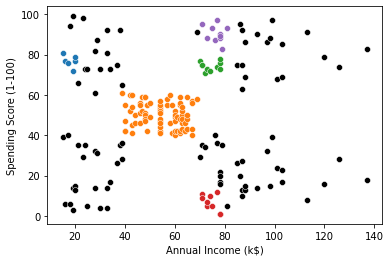

In [80]:
sns.scatterplot(x[cluster==-1]['Annual Income (k$)'],x[cluster==-1]['Spending Score (1-100)'],color='black')
sns.scatterplot(x[cluster==0]['Annual Income (k$)'],x[cluster==0]['Spending Score (1-100)'])
sns.scatterplot(x[cluster==1]['Annual Income (k$)'],x[cluster==1]['Spending Score (1-100)'])
sns.scatterplot(x[cluster==2]['Annual Income (k$)'],x[cluster==2]['Spending Score (1-100)'])
sns.scatterplot(x[cluster==3]['Annual Income (k$)'],x[cluster==3]['Spending Score (1-100)'])
sns.scatterplot(x[cluster ==4]['Annual Income (k$)'],x[cluster==4]['Spending Score (1-100)'])

In [81]:
# black ones are our noice which can't taken by clusters

In [82]:
from sklearn.neighbors import NearestNeighbors

In [83]:
N=NearestNeighbors(n_neighbors=3) #n_neighbors are == minpoints

In [84]:
n=N.fit(x)

In [85]:
distance,indices=n.kneighbors(x)

In [86]:
distance=np.sort(distance,axis=0)
distance

array([[ 0.        ,  0.        ,  1.        ],
       [ 0.        ,  0.        ,  1.        ],
       [ 0.        ,  0.        ,  1.        ],
       [ 0.        ,  0.        ,  1.        ],
       [ 0.        ,  0.        ,  1.        ],
       [ 0.        ,  0.        ,  1.        ],
       [ 0.        ,  0.        ,  1.        ],
       [ 0.        ,  0.        ,  1.        ],
       [ 0.        ,  1.        ,  1.        ],
       [ 0.        ,  1.        ,  1.        ],
       [ 0.        ,  1.        ,  1.        ],
       [ 0.        ,  1.        ,  1.41421356],
       [ 0.        ,  1.        ,  1.41421356],
       [ 0.        ,  1.        ,  1.41421356],
       [ 0.        ,  1.        ,  1.41421356],
       [ 0.        ,  1.        ,  1.41421356],
       [ 0.        ,  1.        ,  1.41421356],
       [ 0.        ,  1.        ,  1.41421356],
       [ 0.        ,  1.        ,  1.41421356],
       [ 0.        ,  1.        ,  1.41421356],
       [ 0.        ,  1.        ,  1.414

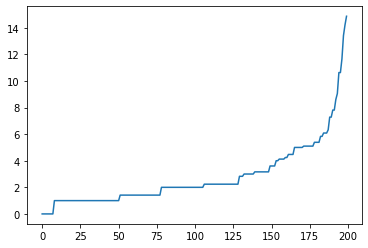

In [89]:
distances=distance[:,1]
distances
plt.plot(distances)  

#jha ek dmm change aya line me vo hmmara optimal value h epsilon ki jaise iss time 5

In [88]:
indices

array([[  0,   4,  16],
       [  1,   3,  15],
       [  2,   6,   8],
       [  3,   5,  13],
       [  4,   0,  16],
       [  5,   3,  13],
       [  6,   2,   8],
       [  7,  11,  19],
       [  8,   6,   2],
       [  9,   5,  13],
       [ 10,  14,  12],
       [ 11,  19,   7],
       [ 12,  10,  14],
       [ 13,  15,   5],
       [ 14,  10,  12],
       [ 15,  13,   5],
       [ 16,  20,  18],
       [ 17,   9,  21],
       [ 18,  26,  20],
       [ 19,  11,   7],
       [ 20,  16,  26],
       [ 21,  23,   9],
       [ 22,  30,   8],
       [ 23,  21,  31],
       [ 24,  34,  36],
       [ 25,  29,  35],
       [ 26,  28,  20],
       [ 27,  17,  43],
       [ 28,  26,  18],
       [ 29,  25,  33],
       [ 30,  32,  22],
       [ 31,  37,  23],
       [ 32,  30,  22],
       [ 33,  41,  29],
       [ 34,  36,  24],
       [ 35,  25,  39],
       [ 36,  34,  24],
       [ 37,  39,  31],
       [ 38,  44,  40],
       [ 39,  37,  35],
       [ 40,  42,  44],
       [ 41,  33

In [90]:
 db= DBSCAN(eps=5,min_samples=3)

In [91]:
cluster= db.fit_predict(x)

In [94]:
cluster

array([-1,  1,  0,  1, -1,  1,  0, -1,  0,  1,  2, -1,  2,  1,  2,  1,  3,
       -1, -1, -1,  3,  4, -1,  4,  5, -1,  3, -1,  3, -1, -1,  4, -1, -1,
        5, -1,  5,  4, -1,  4, -1, -1, -1,  6, -1,  6,  6,  6,  6,  6,  6,
        6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,
        6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,
        6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,
        6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,
        6,  6,  6,  6,  7, -1,  8, -1,  7,  9,  8,  9,  8, -1,  8,  9,  7,
        9,  8,  9,  8,  9,  7, 10,  7,  9,  7, 10,  8,  9,  7,  9,  7,  9,
        8,  9,  7,  9,  8,  9,  8, 10,  7,  9,  7, -1, -1, -1, -1, -1, -1,
       11, -1, 11, -1, 11, -1, 11, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], dtype=int64)

<AxesSubplot:xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

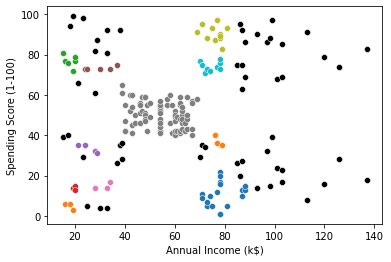

In [96]:
sns.scatterplot(x[cluster ==11]['Annual Income (k$)'],x[cluster==11]['Spending Score (1-100)'])
sns.scatterplot(x[cluster==-1]['Annual Income (k$)'],x[cluster==-1]['Spending Score (1-100)'],color='black')
sns.scatterplot(x[cluster==0]['Annual Income (k$)'],x[cluster==0]['Spending Score (1-100)'])
sns.scatterplot(x[cluster==1]['Annual Income (k$)'],x[cluster==1]['Spending Score (1-100)'])
sns.scatterplot(x[cluster==2]['Annual Income (k$)'],x[cluster==2]['Spending Score (1-100)'])
sns.scatterplot(x[cluster==3]['Annual Income (k$)'],x[cluster==3]['Spending Score (1-100)'])
sns.scatterplot(x[cluster==4]['Annual Income (k$)'],x[cluster==4]['Spending Score (1-100)'])
sns.scatterplot(x[cluster==5]['Annual Income (k$)'],x[cluster==5]['Spending Score (1-100)'])
sns.scatterplot(x[cluster==6]['Annual Income (k$)'],x[cluster==6]['Spending Score (1-100)'])
sns.scatterplot(x[cluster==7]['Annual Income (k$)'],x[cluster==7]['Spending Score (1-100)'])
sns.scatterplot(x[cluster==8]['Annual Income (k$)'],x[cluster==8]['Spending Score (1-100)'])
sns.scatterplot(x[cluster==9]['Annual Income (k$)'],x[cluster==9]['Spending Score (1-100)'])
sns.scatterplot(x[cluster==10]['Annual Income (k$)'],x[cluster==10]['Spending Score (1-100)'])